In [96]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [269]:
# Load data
df1 = pd.read_csv("waterloo_datathon_datasets/demographics_cleaned_with_latlng.csv")

In [270]:
df2 = pd.read_csv("waterloo_datathon_datasets/community_health_cleaned.csv")

In [271]:
df1.columns

Index(['Unnamed: 0', 'year', 'geography', 'total_households',
       'median_household_income', 'mean_household_income', 'mean_earnings',
       'mean_soc_sec', 'mean_ret_income', 'mean_supp_sec_income',
       'mean_cash_pub_income', 'food_stamp_benefits', 'population',
       '%_9999_or_less', '%_150000_or_more', '%_health_insurance',
       '%_private_coverage', '%_public_coverage', 'lat', 'lng'],
      dtype='object')

In [272]:
df2.columns

Index(['county_name', 'health_topic', 'indicator', 'event_count',
       'avg_num_of_denominator', 'precent_or_rate', 'lat', 'lng'],
      dtype='object')

### Aggregate df1

In [273]:
df1 = df1.groupby(["geography"]).agg('mean')
del df1['Unnamed: 0']
del df1['year']
del df1['lat']
del df1['lng']
def isAffluent(d):
    if d < 59000:
        return "Poor"
    if d > 73000:
        return "Rich"
    return "Other"
#df1['affluence'] = df1["mean_household_income"].apply(isAffluent)

In [274]:
df1

,total_households,median_household_income,mean_household_income,mean_earnings,mean_soc_sec,mean_ret_income,mean_supp_sec_income,mean_cash_pub_income,food_stamp_benefits,population,%_9999_or_less,%_150000_or_more,%_health_insurance,%_private_coverage,%_public_coverage
geography,,,,,,,,,,,,,,,
Albany,123237.000000,59533.166667,78153.166667,79725.500000,18274.500000,28040.166667,9281.166667,4248.000000,12708.333333,302562.6,0.064568,0.110344,0.935297,0.779009,0.292082
Allegany,18548.166667,42671.166667,53484.833333,53189.500000,16991.333333,18400.166667,9286.166667,3773.166667,2968.166667,47840.4,0.072069,0.029700,0.906487,0.690165,0.369358
Bronx,479335.166667,34552.833333,49696.500000,55479.833333,13704.666667,19872.000000,8615.166667,3456.666667,169468.166667,1389130.2,0.159608,0.040766,0.856036,0.433159,0.508612
Broome,79591.833333,46301.000000,61022.500000,62550.000000,17577.500000,20982.833333,8975.166667,3861.333333,11430.833333,195789.8,0.083273,0.059461,0.922855,0.697362,0.374207
Cattaraugus,32006.666667,43091.166667,54080.833333,54135.500000,16817.833333,18379.500000,9108.166667,3212.500000,4893.333333,78579.2,0.067991,0.031033,0.891472,0.678869,0.383490
Cayuga,31243.833333,51609.833333,62609.333333,64117.000000,17224.333333,19548.166667,9616.500000,3174.666667,3630.666667,76050.2,0.059992,0.049722,0.907091,0.707250,0.355508
Chautauqua,54300.333333,42460.000000,53607.166667,54418.333333,16932.166667,19784.833333,9508.500000,3764.833333,9188.166667,130653.2,0.089119,0.034846,0.916932,0.669208,0.404092
Chemung,35341.000000,48850.666667,62895.666667,65716.500000,17175.833333,19352.833333,9474.000000,3493.833333,5254.000000,84384.2,0.074806,0.060373,0.925553,0.694281,0.382976
Chenango,19774.833333,44967.333333,56294.166667,57515.666667,17063.333333,17296.166667,9762.000000,3151.166667,3118.666667,49274.4,0.072761,0.035596,0.909179,0.661436,0.403729


### Aggregate df2

In [114]:
df2 = df2[['county_name', 'event_count', 'lat', 'lng']].groupby(['county_name', 'lat', 'lng']).agg('sum')

In [119]:
df2 = df2.reset_index().set_index('county_name')

### Join dfs

In [255]:
joined = df1.join(df2, how='left', lsuffix='_left', rsuffix='_right')

In [256]:
pd.options.display.max_columns = None

In [257]:
joined.loc[:, 'event_count_to_population'] = 2**(joined['event_count'].astype(float) / joined['population'].astype(float))

In [259]:
joined[['lat', 'lng', 'event_count_to_population', 'affluence']]

,lat,lng,event_count_to_population,affluence
geography,,,,
Albany,42.678066,-73.814233,55.404020,Rich
Allegany,42.226801,-78.020567,106.828865,Poor
Bronx,40.855890,-73.868294,266.323111,Poor
Broome,42.122015,-75.933191,95.494768,Other
Cattaraugus,42.224267,-78.606673,92.003831,Poor
Cayuga,42.940095,-76.560755,61.655229,Other
Chautauqua,42.246904,-79.315313,96.990361,Poor
Chemung,42.116644,-76.812331,222.771701,Other
Chenango,42.481798,-75.570013,154.193907,Poor


# Map

In [226]:
# Imports and constants

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shapefile
import os
import time

from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
from sklearn.cluster import KMeans

%matplotlib inline

kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian

# to record runtime
start = time.time()

In [227]:
# Parameters to control

LAT_COLUMN_NAME = 'lat'
LON_COLUMN_NAME = 'lng'

In [260]:
df = joined[['lat', 'lng', 'event_count_to_population', 'affluence']]
cluster_start = time.time()
coords = df.as_matrix(columns=[LAT_COLUMN_NAME, LON_COLUMN_NAME])
events = df['event_count_to_population'].values

In [288]:
# Create clusters

db = KMeans(n_jobs=-1, n_clusters=20).fit(coords)
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
event_count_clusters = pd.Series([events[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 20


In [289]:
centermost_points = db.cluster_centers_
n_points_in_clusters = list(map(len, clusters))
total_number_of_points = len(coords)
mean_count = [cluster.mean() for cluster in event_count_clusters]
normalized_count = [float(i)/max(mean_count) for i in mean_count]
# def get_centermost_point(cluster):
#     """
#     cluster: DataFrame
#     """
#     # [[ (lat, lon) ]]
#     lat_lon_points = [(row[LAT_COLUMN_NAME], row[LON_COLUMN_NAME]) for _, row in cluster.iterrows()]
#     multi_point = MultiPoint(lat_lon_points)
#     centroid = (multi_point.centroid.x, multi_point.centroid.y)
#     centermost_point = min(lat_lon_points, key=lambda point: great_circle(point, centroid).m)
#     return tuple(centermost_point)
# centermost_points = clusters.map(get_centermost_point)
for cluster in event_count_clusters:
    print(cluster[:10])

[55.40402036 80.31215569 20.50333686 91.21653376 66.3838731  64.23160875]
[61.65522933 54.06987996 56.72697993 59.45905595]
[266.32311113  64.29192122  37.62993751  36.27453526  37.12945681
  52.12041013  59.72730734  42.44673084]
[ 75.10547012  37.2706613  142.10327797]
[106.82886469  92.00383079  62.57926721 105.70085794  48.29160601]
[165.59134808]
[89.78478784 61.87623703]
[37.0948376  69.72031121 18.02209904 61.03103626]
[243.45782249  26.99078102 509.480027    49.2719436 ]
[ 95.49476821 123.65517549  12.11875017  14.01008972]
[210.09422246  57.99769999]
[154.1939074   85.31350608  47.71020065]
[151.8255747]
[57.69947904]
[ 82.21069944 107.16482802]
[96.99036054]
[64.01714112 64.11172566]
[222.77170103  92.1994228   85.33002652  50.11679011]
[96.91289418]
[30.68203226 62.02217774 42.78700736 67.56119235]


In [290]:
# Get representative points
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})
rep_points

,lat,lon
0,42.981626,-73.724554
1,43.057645,-76.466912
2,40.804711,-73.898291
3,43.068808,-75.358683
4,42.684645,-78.244566
5,44.689468,-75.242045
6,44.448985,-73.617014
7,41.592090,-73.974813
8,43.063918,-74.375786
9,42.325098,-76.212804


In [291]:
# Join the original DF to get other data
# result = rep_points.merge(df, left_on=['lat', 'lon'], right_on=[LAT_COLUMN_NAME, LON_COLUMN_NAME])
result = rep_points

In [292]:
# Preview
result.head()

,lat,lon
0,42.981626,-73.724554
1,43.057645,-76.466912
2,40.804711,-73.898291
3,43.068808,-75.358683
4,42.684645,-78.244566


In [293]:
# Parameters to control

rcParams['figure.figsize'] = (14,10)    # figure size
fig_margin = 0.8  # margin to leave between points and figure border on all 4 sides, in lat/lon degrees
fig_title = 'Negative health event count'
fig_length = 42      # height of figure
shapefilename = 'waterloo_datathon_datasets/ny_state_shapes/NYS_Civil_Boundaries_SHP/Counties_new'   # name of shapefile

In [294]:
descripton = 'Negative health event count'
shpfile = os.path.expanduser(shapefilename)
#shpfile2 = os.path.expanduser('Toronto-shp/shape/buildings')

fontcolor='#666666'

lllat = result.lat.min() - fig_margin
lllon = result.lon.min() - fig_margin
urlat = result.lat.max() + fig_margin
urlon = result.lon.max() + fig_margin


In [295]:
print(lllat)
print(lllon)
print(urlat)
print(urlon)

40.00471137500001
-80.115313
45.50569899999999
-72.31903199999999


/home/ubuntu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/ubuntu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


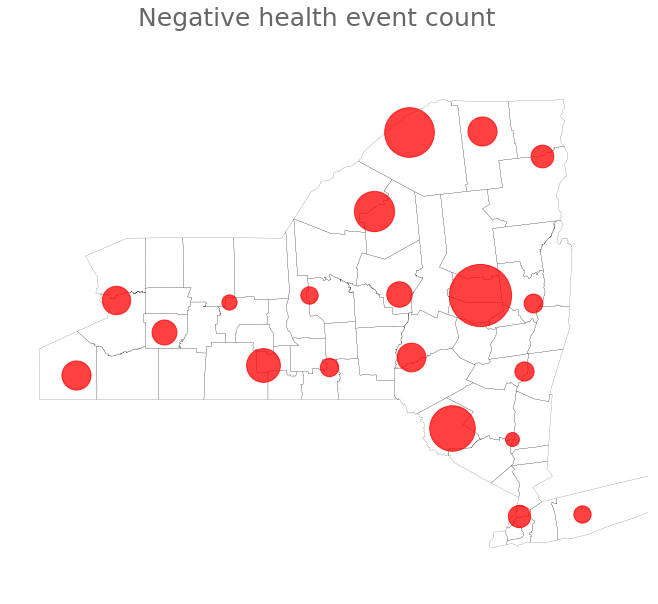

In [296]:
# fig = plt.figure(figsize=((urlon - lllon) * (fig_length - 2) / (urlat - lllat), fig_length))
fig = plt.figure()
# ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle(fig_title, fontsize=25, y=.94, color=fontcolor)
m = Basemap(llcrnrlat = lllat, llcrnrlon=lllon, urcrnrlat=urlat, urcrnrlon=urlon, lat_0=(urlat+lllat)/2, lon_0=(urlon+lllon)/2, resolution='c', projection='mill')

# Avoid border around map.
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

m.readshapefile(shpfile, 'metro', linewidth=.15)
#m.readshapefile(shpfile2, 'metro', linewidth=.15)

for index, row in result.iterrows():
    m.plot(row.lon, row.lat, marker='o', color='red', markersize= 0.3 * (mean_count[index]), alpha = 0.75, latlon=True)
# m.plot(43.6555, -79.3997, marker='o', markersize= 20, alpha = 0.75, latlon=True)
# m.plot(0, 0, marker='o', markersize= 20, alpha = 0.75)
# m.plot(85, 150, marker='o', markersize= 20, alpha = 0.75)